In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#scikit-learn
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_brut = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Nettoyage_v1.csv"
df = pd.read_csv(data_brut)

In [3]:
#data_finale = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Nettoyage_Final.csv"
#df_f = pd.read_csv(data_finale, sep=",")

Attention au LargestPropertyUseType, LargestPropertyUseTypeGFA dans la suppression des NA

In [4]:
# deleted columns
#df = df_f.drop(columns=["Unnamed: 0","Latitude","Longitude","ENERGYSTARScore","TotalGHGEmissions"])

In [5]:
df = df.drop(columns=["Unnamed: 0", "Latitude","Longitude","ListOfAllPropertyUseTypes","ENERGYSTARScore","Electricity(kBtu)","NaturalGas(kBtu)","SiteEnergyUse(kBtu)"])

In [6]:
df = df.dropna()

In [6]:
print("Pourcentage de valeurs nulles: {}%".format(df.isna().mean().sum()))

Pourcentage de valeurs nulles: 0.005239030779305829%


In [8]:
df.isna().mean()

PrimaryPropertyType          0.00000
Neighborhood                 0.00000
YearBuilt                    0.00000
NumberofBuildings            0.00000
NumberofFloors               0.00000
PropertyGFATotal             0.00000
PropertyGFAParking           0.00000
PropertyGFABuilding(s)       0.00000
LargestPropertyUseType       0.00262
LargestPropertyUseTypeGFA    0.00262
SiteEnergyUseWN(kBtu)        0.00000
Prop.Electricity             0.00000
Prop.NaturalGas              0.00000
dtype: float64

In [9]:
categorical_cols = list(df.select_dtypes(include="object").columns)
numerical_cols = list(df.select_dtypes(include=["int","float"]).columns)

In [10]:
X = df[categorical_cols + numerical_cols]
y = df["SiteEnergyUseWN(kBtu)"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = df.select_dtypes(include="object").columns
numerical_cols = df.select_dtypes(include=["int","float"]).columns

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# KNeighborsRegressor()

In [12]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', KNeighborsRegressor())])

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    'model__n_neighbors': list(range(1, 30)),
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


0.7489642712399514
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)',
       'Prop.Electricity', 'Prop.NaturalGas'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'LargestPropertyUseType'],
      dtype='object'))])),
         

In [13]:
result = pd.DataFrame(grid_search.cv_results_)

In [14]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010549,0.000745,0.048461,0.031933,1,{'model__n_neighbors': 1},0.897945,0.890467,0.434802,0.741071,0.216586,2,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.007723,0.000196,0.025152,0.001100,2,{'model__n_neighbors': 2},0.825135,0.904081,0.517676,0.748964,0.166691,1,0.911242,0.956731,0.956453,0.941476,0.021379
2,0.008196,0.000934,0.023524,0.000690,3,{'model__n_neighbors': 3},0.795754,0.831337,0.523410,0.716834,0.137541,3,0.871072,0.896214,0.924201,0.897162,0.021700
3,0.008990,0.000806,0.024649,0.001621,4,{'model__n_neighbors': 4},0.728646,0.798836,0.553092,0.693525,0.103353,5,0.823404,0.864154,0.891347,0.859635,0.027921
4,0.006509,0.001072,0.023568,0.003982,5,{'model__n_neighbors': 5},0.672968,0.791961,0.641005,0.701978,0.064952,4,0.776984,0.843755,0.856053,0.825597,0.034740
5,0.006533,0.000642,0.021022,0.000939,6,{'model__n_neighbors': 6},0.656446,0.766122,0.638752,0.687107,0.056337,7,0.753390,0.833910,0.820180,0.802493,0.035171
6,0.007691,0.000378,0.022007,0.002099,7,{'model__n_neighbors': 7},0.631553,0.797948,0.636720,0.688741,0.077250,6,0.732848,0.799910,0.795153,0.775970,0.030554
7,0.007136,0.001609,0.022759,0.001677,8,{'model__n_neighbors': 8},0.602936,0.769412,0.623763,0.665370,0.074058,8,0.709064,0.764514,0.764768,0.746115,0.026199
8,0.007480,0.001793,0.021707,0.000281,9,{'model__n_neighbors': 9},0.587185,0.746684,0.620588,0.651486,0.068683,9,0.700863,0.744692,0.732031,0.725862,0.018417
9,0.007775,0.001456,0.024743,0.001940,10,{'model__n_neighbors': 10},0.569146,0.735308,0.616396,0.640283,0.069906,10,0.690306,0.720332,0.709463,0.706700,0.012413


In [15]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_kkn_result.csv", sep=";")

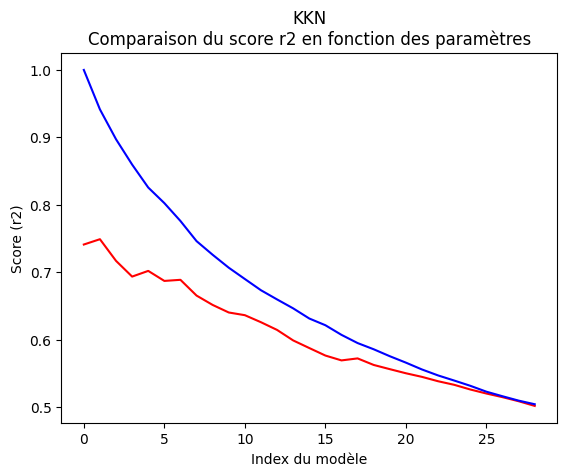

In [16]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("KKN\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_kkn_score.png", dpi=300)

# RandomForestRegressor

In [17]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())])

param_grid = {
    'model__n_estimators': [100],          # Number of trees in the forest
    'model__max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'model__min_samples_split': [2, 5, 10],       # Minimum number of samples to split a node
    'model__min_samples_leaf': [1, 2, 4],         # Bootstrap Aggregating (Bagging)
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.9470824666725205
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)',
       'Prop.Electricity', 'Prop.NaturalGas'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       '

In [18]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.703963,0.098320,0.023379,0.000845,None,1,2,100,"{'model__max_depth': None, 'model__min_samples...",0.808748,0.989256,0.967699,0.921901,0.080494,21,0.962128,0.993013,0.997309,0.984150,0.015670
1,2.608716,0.053120,0.025701,0.007392,None,1,5,100,"{'model__max_depth': None, 'model__min_samples...",0.873002,0.978750,0.950967,0.934240,0.044762,13,0.968833,0.987525,0.993879,0.983412,0.010630
2,1.902572,0.064615,0.019439,0.002435,None,1,10,100,"{'model__max_depth': None, 'model__min_samples...",0.853505,0.963846,0.950295,0.922549,0.049134,19,0.958376,0.977255,0.994564,0.976732,0.014778
3,2.536579,0.058808,0.020454,0.001184,None,2,2,100,"{'model__max_depth': None, 'model__min_samples...",0.879235,0.981430,0.980581,0.947082,0.047976,1,0.940368,0.988320,0.994645,0.974444,0.024234
4,2.371927,0.142024,0.023744,0.005462,None,2,5,100,"{'model__max_depth': None, 'model__min_samples...",0.871694,0.972894,0.975997,0.940195,0.048454,6,0.936136,0.983207,0.994591,0.971311,0.025303
5,1.737230,0.025212,0.024777,0.003712,None,2,10,100,"{'model__max_depth': None, 'model__min_samples...",0.851808,0.968696,0.968586,0.929697,0.055076,16,0.927477,0.978000,0.990531,0.965336,0.027255
6,1.885811,0.024632,0.019490,0.002126,None,4,2,100,"{'model__max_depth': None, 'model__min_samples...",0.777278,0.912655,0.829299,0.839744,0.055759,26,0.865644,0.915427,0.911778,0.897617,0.022657
7,1.866774,0.046476,0.018518,0.000874,None,4,5,100,"{'model__max_depth': None, 'model__min_samples...",0.775968,0.900817,0.765766,0.814184,0.061400,35,0.862969,0.899393,0.901881,0.888081,0.017786
8,1.630366,0.026344,0.021597,0.004826,None,4,10,100,"{'model__max_depth': None, 'model__min_samples...",0.771990,0.913164,0.760568,0.815241,0.069399,34,0.864140,0.912810,0.894789,0.890579,0.020091
9,2.683852,0.058924,0.021514,0.001620,10,1,2,100,"{'model__max_depth': 10, 'model__min_samples_l...",0.858716,0.986979,0.961468,0.935721,0.055438,11,0.974135,0.991332,0.996860,0.987442,0.009676


In [19]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_RandomForest_result.csv", sep=";")

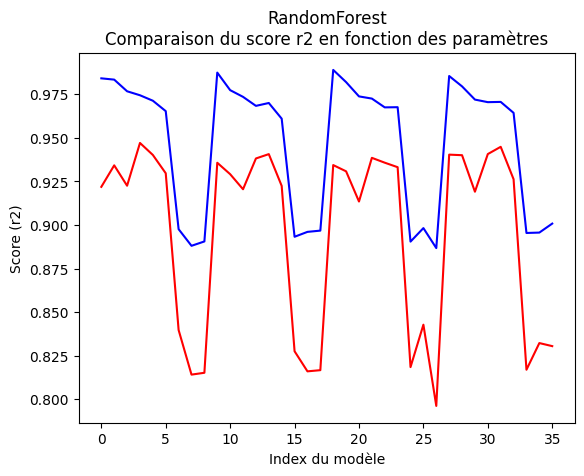

In [20]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("RandomForest\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_RandomForest_score.png", dpi=300)

# GradientBoostingRegressor()

In [21]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor())])

param_grid = {
    'model__n_estimators': [10, 100, 200],          # Number of trees in the forest
    'model__min_samples_split': [2, 5, 10],       # Minimum number of samples to split a node
    'model__min_samples_leaf': [1, 2, 4],
    #'model__learning_rate': [0.1, 0.01, 0.001],       # Bootstrap Aggregating (Bagging)
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9729751112124093
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)',
       'Prop.Electricity', 'Prop.NaturalGas'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'L

In [22]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.074862,0.006526,0.020835,0.008222,1,2,10,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.800370,0.849852,0.663048,0.771090,0.079023,20,0.871207,0.868930,0.870173,0.870103,9.307483e-04
1,0.703881,0.039987,0.010670,0.000524,1,2,100,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.982071,0.998754,0.938101,0.972975,0.025583,1,0.999980,0.999974,0.999977,0.999977,2.421001e-06
2,1.418928,0.068807,0.013021,0.001021,1,2,200,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.984922,0.997785,0.931068,0.971258,0.028900,2,0.999987,0.999984,0.999987,0.999986,1.369374e-06
3,0.089296,0.007926,0.011908,0.001918,1,5,10,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.767257,0.837215,0.663048,0.755840,0.071560,24,0.865610,0.861579,0.867881,0.865023,2.605843e-03
4,0.720267,0.012905,0.009964,0.000204,1,5,100,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.977420,0.997641,0.931314,0.968792,0.027757,3,0.999979,0.999972,0.999976,0.999976,2.642274e-06
5,1.354066,0.042340,0.019113,0.011354,1,5,200,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.945893,0.998253,0.922582,0.955576,0.031642,5,0.999987,0.999986,0.999987,0.999987,4.144875e-07
6,0.081900,0.004136,0.008991,0.000959,1,10,10,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.796142,0.831582,0.663048,0.763591,0.072552,22,0.865610,0.858409,0.867881,0.863966,4.037868e-03
7,0.688876,0.013955,0.011177,0.001110,1,10,100,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.976109,0.998713,0.911760,0.962194,0.036837,4,0.999976,0.999966,0.999974,0.999972,4.537960e-06
8,1.299321,0.031827,0.010773,0.003370,1,10,200,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.948440,0.998721,0.911581,0.952914,0.035715,12,0.999984,0.999980,0.999984,0.999983,1.858068e-06
9,0.084659,0.005470,0.009301,0.000472,2,2,10,"{'model__min_samples_leaf': 2, 'model__min_sam...",0.794572,0.855666,0.663048,0.771095,0.080369,19,0.841353,0.865260,0.869857,0.858823,1.249507e-02


In [23]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_GradienBoosting_result.csv", sep=";")

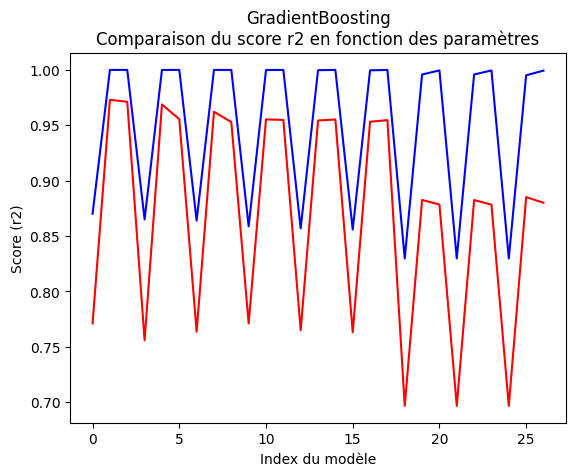

In [24]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("GradientBoosting\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_GradientBoosting_score.png", dpi=300)

# SVR

In [25]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', SVR())])

param_grid = {
    'model__C': [1, 100, 1e3, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10],
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.599854140660965
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)',
       'Prop.Electricity', 'Prop.NaturalGas'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'Lar

In [26]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.110553,0.023376,0.045095,0.007470,1,{'model__C': 1},-0.065563,-0.075117,-0.075845,-0.072175,0.004685,9,-0.080037,-0.066383,-0.062123,-0.069514,7.641260e-03
1,0.095113,0.011733,0.042073,0.007328,100,{'model__C': 100},-0.065471,-0.074971,-0.075632,-0.072025,0.004642,8,-0.079858,-0.066267,-0.062003,-0.069376,7.613811e-03
2,0.088298,0.009103,0.035137,0.001532,1000.0,{'model__C': 1000.0},-0.064679,-0.073646,-0.073698,-0.070674,0.004239,7,-0.078319,-0.065209,-0.060913,-0.068147,7.403562e-03
3,0.093700,0.007631,0.089317,0.059914,100000.0,{'model__C': 100000.0},0.006714,0.039001,0.070562,0.038759,0.026066,6,0.054450,0.025724,0.022207,0.034127,1.444206e-02
4,0.190096,0.048943,0.071652,0.010421,1000000.0,{'model__C': 1000000.0},0.147913,0.243476,0.325524,0.238971,0.072579,5,0.300482,0.206586,0.189665,0.232244,4.874342e-02
5,0.651759,0.107848,0.039748,0.007387,10000000.0,{'model__C': 10000000.0},0.278032,0.432478,0.549941,0.420150,0.111348,4,0.563322,0.458062,0.388938,0.470107,7.169982e-02
6,0.789801,0.138299,0.045555,0.008886,100000000.0,{'model__C': 100000000.0},0.386461,0.536812,0.714216,0.545830,0.133957,3,0.899874,0.880613,0.824257,0.868248,3.208503e-02
7,1.800087,0.675244,0.033159,0.003860,1000000000.0,{'model__C': 1000000000.0},0.418096,0.574288,0.807178,0.599854,0.159868,1,1.000000,1.000000,1.000000,1.000000,1.104713e-08
8,4.352392,2.030471,0.026335,0.006344,10000000000.0,{'model__C': 10000000000.0},0.416397,0.573498,0.806616,0.598837,0.160311,2,1.000000,1.000000,1.000000,1.000000,6.666329e-10


In [27]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_SVR_result.csv", sep=";")

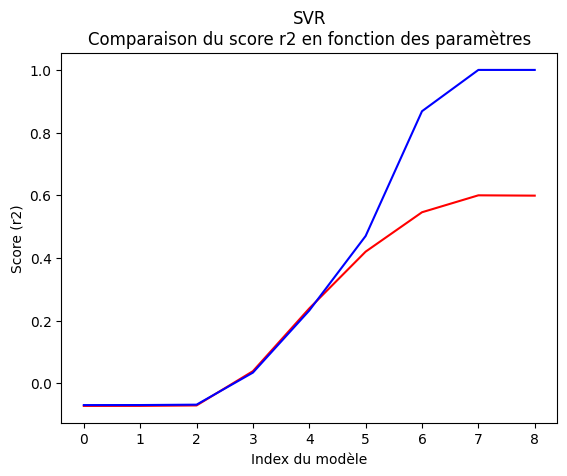

In [28]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("SVR\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_SVR_score.png", dpi=300)

# Ridge

In [29]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Ridge())])

param_grid = {
    'model__alpha': [1e-3, 1e-1, 1e1, 1e3],
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.9999942592884336
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)',
       'Prop.Electricity', 'Prop.NaturalGas'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'La

In [30]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.073504,0.010491,0.022730,0.015930,0.001,{'model__alpha': 0.001},0.999999,0.999994,0.999990,0.999994,0.000004,1,0.999999,0.999998,0.999998,0.999998,5.549264e-07
1,0.066534,0.013714,0.030219,0.017396,0.1,{'model__alpha': 0.1},0.999999,0.999994,0.999989,0.999994,0.000004,2,0.999999,0.999998,0.999998,0.999998,5.442112e-07
2,0.045489,0.015521,0.035461,0.017870,10.0,{'model__alpha': 10.0},0.999020,0.999714,0.999396,0.999377,0.000284,3,0.999555,0.999676,0.999644,0.999625,5.125101e-05
3,0.020667,0.001247,0.014071,0.002044,1000.0,{'model__alpha': 1000.0},0.701920,0.821016,0.803463,0.775466,0.052496,4,0.796859,0.764796,0.778329,0.779994,1.314262e-02


In [31]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Ridge_result.csv", sep=";")

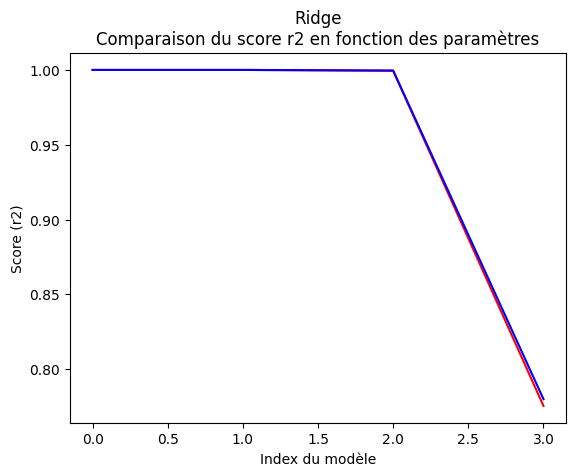

In [32]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("Ridge\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Ridge_score.png", dpi=300)

# Lasso

In [33]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Lasso())])

param_grid = {
    'model__alpha': [1e-3, 1e-1, 1, 1e1, 1e3, 1e4, 1e5, 1e6, 1e8],
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.9999999918710444
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)',
       'Prop.Electricity', 'Prop.NaturalGas'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'La

In [34]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.081455,0.009475,0.007667,0.000471,0.001,{'model__alpha': 0.001},1.000000,1.000000,1.000000,1.000000,4.836755e-08,5,1.000000,1.000000,1.000000,1.000000,9.235935e-09
1,0.067382,0.002045,0.007733,0.000398,0.1,{'model__alpha': 0.1},1.000000,1.000000,1.000000,1.000000,4.822317e-08,4,1.000000,1.000000,1.000000,1.000000,9.199616e-09
2,0.065948,0.002472,0.008486,0.000631,1,{'model__alpha': 1},1.000000,1.000000,1.000000,1.000000,5.256630e-08,3,1.000000,1.000000,1.000000,1.000000,8.539995e-09
3,0.068686,0.010096,0.008137,0.000840,10.0,{'model__alpha': 10.0},1.000000,1.000000,1.000000,1.000000,3.382833e-08,2,1.000000,1.000000,1.000000,1.000000,8.826466e-09
4,0.038736,0.000966,0.007501,0.000495,1000.0,{'model__alpha': 1000.0},1.000000,1.000000,1.000000,1.000000,4.062562e-09,1,1.000000,1.000000,1.000000,1.000000,2.519911e-09
5,0.028432,0.002861,0.008062,0.000811,10000.0,{'model__alpha': 10000.0},1.000000,1.000000,1.000000,1.000000,6.988335e-08,6,1.000000,1.000000,1.000000,1.000000,6.955253e-08
6,0.018667,0.001247,0.010362,0.002625,100000.0,{'model__alpha': 100000.0},0.999964,0.999977,0.999980,0.999974,6.988335e-06,7,0.999964,0.999977,0.999980,0.999974,6.955253e-06
7,0.027079,0.008865,0.008330,0.000539,1000000.0,{'model__alpha': 1000000.0},0.996378,0.997736,0.997959,0.997358,6.988335e-04,8,0.996396,0.997737,0.997977,0.997370,6.955253e-04
8,0.015667,0.000474,0.006948,0.000780,100000000.0,{'model__alpha': 100000000.0},-0.005213,-0.000568,-0.008960,-0.004914,3.432438e-03,9,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [35]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Lasso_result.csv", sep=";")

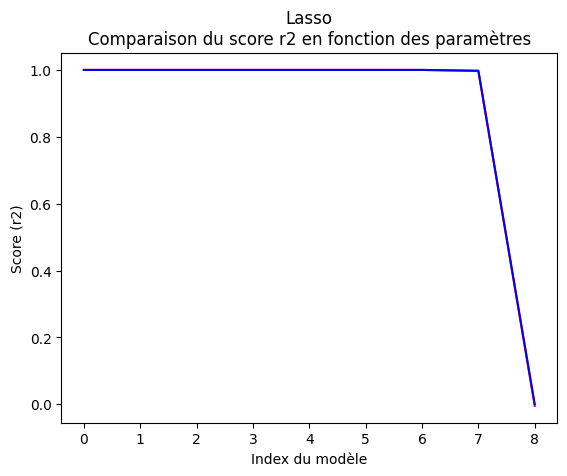

In [36]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("Lasso\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Lasso_score.png", dpi=300)

hyperopt, optuna -> 

Faire Grid search CV sur la pipeline (ajouter return_train_score = True)

In [37]:

Etudier l'importance des variables uniquement sur le meilleur model

feature_importance (local)

mettre dans la pipeline, à la place du standardScaler un powertransformer(choisi la meilleur transformation possible)

Garder les résultats des modèles (exporter csv avec résultat)



SyntaxError: unterminated string literal (detected at line 1) (1196697725.py, line 1)